In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import tensorflow as tf
from tensorflow.contrib.layers import flatten

from keras.layers.pooling import MaxPooling2D
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping, Callback
from keras.layers import Dense, Dropout, Activation, Flatten, Lambda, ELU,GlobalAveragePooling2D, regularizers
from keras.layers.convolutional import Convolution2D, Cropping2D, Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import adam
from sklearn.utils import shuffle
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


import time, cv2, glob

global inputShape,size

def kerasModel4():
        model = Sequential()
        model.add(Conv2D(16, (8, 8), strides=(4, 4), padding='valid', input_shape=(size,size,1)))
        model.add(Activation('relu'))
        model.add(Conv2D(32, (5, 5), padding="same"))
        model.add(Activation('relu'))
        model.add(GlobalAveragePooling2D())
        # model.add(Dropout(.2))
        # model.add(Activation('relu'))
        # model.add(Dense(1024))
        # model.add(Dropout(.5))
        model.add(Dense(512))
        model.add(Dropout(.1))
        model.add(Activation('relu'))
        # model.add(Dense(256))
        # model.add(Dropout(.5))
        # model.add(Activation('relu'))
        model.add(Dense(2))
        model.add(Activation('softmax'))
        return model

size=100


Using TensorFlow backend.


In [2]:
potholeTrainImages = glob.glob("C:/Users/shaify's beast .DESKTOP-UQV5OIU/Documents/pothole/My Dataset/train/Pothole\*.jpg")
potholeTrainImages.extend(glob.glob("C:/Users/shaify's beast .DESKTOP-UQV5OIU/Documents/pothole/My Dataset/train/Pothole\*.jpeg"))
potholeTrainImages.extend(glob.glob("C:/Users/shaify's beast .DESKTOP-UQV5OIU/Documents/pothole/My Dataset/train/Pothole\*.png"))


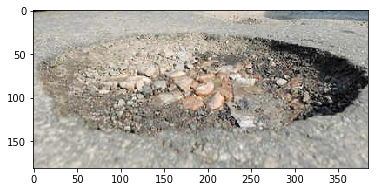

In [3]:
img = image.load_img("C:/Users/shaify's beast .DESKTOP-UQV5OIU/Documents/pothole/My Dataset/train/Pothole\\potholes1.png")
plt.imshow(img)

In [4]:
train1 = [cv2.imread(img,0) for img in potholeTrainImages]
for i in range(0,len(train1)):
    train1[i] = cv2.resize(train1[i],(size,size))
temp1 = np.asarray(train1)



In [5]:
nonPotholeTrainImages = glob.glob("C:/Users/shaify's beast .DESKTOP-UQV5OIU/Documents/pothole/My Dataset/train/Plain/*.jpg")

In [6]:
train2 = [cv2.imread(img,0) for img in nonPotholeTrainImages]
# train2[train2 != np.array(None)]
for i in range(0,len(train2)):
    train2[i] = cv2.resize(train2[i],(size,size))
temp2 = np.asarray(train2)


In [7]:
nonPotholeTestImages = glob.glob("C:/Users/shaify's beast .DESKTOP-UQV5OIU/Documents/pothole/My Dataset/test/Plain/*.jpg")
test2 = [cv2.imread(img,0) for img in nonPotholeTestImages]
# train2[train2 != np.array(None)]
for i in range(0,len(test2)):
    test2[i] = cv2.resize(test2[i],(size,size))
temp4 = np.asarray(test2)

In [8]:
potholeTestImages = glob.glob("C:/Users/shaify's beast .DESKTOP-UQV5OIU/Documents/pothole/My Dataset/test/Pothole/*.jpg")
test1 = [cv2.imread(img,0) for img in potholeTestImages]
# train2[train2 != np.array(None)]
for i in range(0,len(test1)):
    test1[i] = cv2.resize(test1[i],(size,size))
temp3 = np.asarray(test1)

In [9]:
print(temp1)

[[[149 136 135 ...  35  30  32]
  [155 159 165 ...  40  31  29]
  [148 142 141 ...  93  86  85]
  ...
  [135  89 160 ... 147 163 157]
  [129 100 169 ... 154 154 176]
  [131 121 123 ... 149 147 157]]

 [[  4  33  39 ... 124 119 118]
  [120 147 154 ... 123 116 104]
  [167 158 164 ... 112 124 115]
  ...
  [188 164 175 ... 193 170 157]
  [181 176 188 ... 189 173 176]
  [178 181 185 ... 180 161 169]]

 [[180 176 176 ... 164 143 158]
  [181 167 175 ... 182 174 197]
  [171 178 173 ... 184 164 155]
  ...
  [122 109 109 ... 128 130 132]
  [131 115 140 ... 128 117 128]
  [ 96  99 101 ... 122 132 128]]

 ...

 [[155 141 149 ... 182 178 183]
  [148 157 157 ... 184 176 174]
  [160 152 150 ... 184 184 187]
  ...
  [157 131 114 ...  35  37  40]
  [131 123 149 ...  44  36  33]
  [105  60  95 ...  35  36  34]]

 [[122 122 119 ... 128 117 124]
  [118 121 121 ... 128 138 143]
  [125 126 128 ... 148 134 131]
  ...
  [123 133 130 ...  72 154 149]
  [113 112 131 ...  74  96 142]
  [121 121 129 ...  87  55  

In [10]:
X_train = []
X_train.extend(temp1)
X_train.extend(temp2)
X_train = np.asarray(X_train)

X_test = []
X_test.extend(temp3)
X_test.extend(temp4)
X_test = np.asarray(X_test)

y_train1 = np.ones([temp1.shape[0]],dtype = int)
y_train2 = np.zeros([temp2.shape[0]],dtype = int)
y_test1 = np.ones([temp3.shape[0]],dtype = int)
y_test2 = np.zeros([temp4.shape[0]],dtype = int)
print(y_train1)
print(y_train2)
# print(y_test1[0])
# print(y_test2[0])
# print(y_train1.size)
# print(y_train2.size)
# print(y_test1.size)
# print(y_test2.size)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [11]:

y_train = []
y_train.extend(y_train1)
y_train.extend(y_train2)
y_train = np.asarray(y_train)
print(y_train.shape)
y_test = []
y_test.extend(y_test1)
y_test.extend(y_test2)
y_test = np.asarray(y_test)
X_train,y_train = shuffle(X_train,y_train)
X_test,y_test = shuffle(X_test,y_test)
X_train = X_train.reshape(X_train.shape[0], size, size, 1)
X_test = X_test.reshape(X_test.shape[0], size, size, 1)

(1005,)


In [ ]:
print(X_train)

In [ ]:
# One hot coding implemented
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_train

In [16]:
print("train shape X", X_train.shape)
print("train shape y", y_train.shape)


train shape X (1005, 100, 100, 1)
train shape y (1005, 2)


In [ ]:
inputShape = (size, size, 1)
model = kerasModel4()
model.compile('adam', 'categorical_crossentropy', ['accuracy'])
history = model.fit(X_train, y_train,epochs=10,validation_split=0.1)
metrics = model.evaluate(X_test, y_test)
for metric_i in range(len(model.metrics_names)):
    metric_name = model.metrics_names[metric_i]
    metric_value = metrics[metric_i]
    print('{}: {}'.format(metric_name, metric_value))

print("Saving model weights and configuration file")

model.save('sample2.h5')

model_json = model.to_json()
with open("truesample.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("truesample.h5")
print("Saved model to disk")

In [18]:
from sklearn.metrics import accuracy_score
predictions = model.predict(X_test)

In [20]:
print(y_test.shape)

(16, 2)


In [21]:
y_test_classes = y_test.argmax(1)

In [23]:
y_pred_classes = predictions.argmax(1)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_classes,y_pred_classes))
cf_matrix = confusion_matrix(y_test_classes,y_pred_classes)

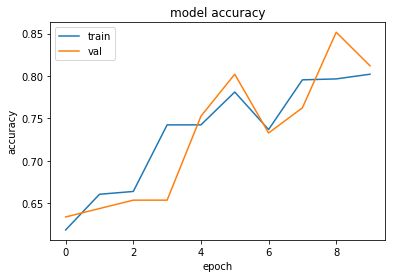

In [32]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()